<h1>Extracting Stock Data Using a Python Library</h1>


<p>I will hypothetically work as a data analyst for a hedge fund; my job is to determine any suspicious stock activity. I will extract stock data using a Python library. I will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe.</p>


In [1]:
# !pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Using the yfinance Library to Extract Stock Data


I will use the Ticker module and create an object that will allow me to access functions to extract data. 

In [3]:
apple = yf.Ticker("AAPL")

In [6]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

I can get the any values from this dictionary using the key:


In [7]:
apple_info['averageVolume']

89115366

### Extracting Share Price


I will use the history() method to get the share price of the stock over a certain period of time. 

Specifing the period parameter I can set how far back from the present to get data (the options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max)


Then the format that the data is returned in is a Pandas DataFrame. 

In [16]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092492,0.092927,0.092492,0.092492,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-02 00:00:00-05:00,145.960007,148.000000,145.649994,147.809998,65421400,0.0,0.0
2022-12-05 00:00:00-05:00,147.770004,150.919998,145.770004,146.630005,68826400,0.0,0.0
2022-12-06 00:00:00-05:00,147.070007,147.300003,141.919998,142.910004,64727200,0.0,0.0


I can also set a different period:

In [14]:
apple_share_price_data_1month = apple.history(period="1mo")
apple_share_price_data_1month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-09 00:00:00-05:00,138.500000,138.550003,134.589996,134.869995,74917800,0,0
2022-11-10 00:00:00-05:00,141.240005,146.869995,139.500000,146.869995,118854000,0,0
2022-11-11 00:00:00-05:00,145.820007,150.009995,144.369995,149.699997,93979700,0,0
2022-11-14 00:00:00-05:00,148.970001,150.279999,147.429993,148.279999,73374100,0,0
2022-11-15 00:00:00-05:00,152.220001,153.589996,148.559998,150.039993,89868300,0,0


I will go on with the max period:


In [17]:
apple_share_price_data.reset_index(inplace=True)

I will plot the Open price against the Date:


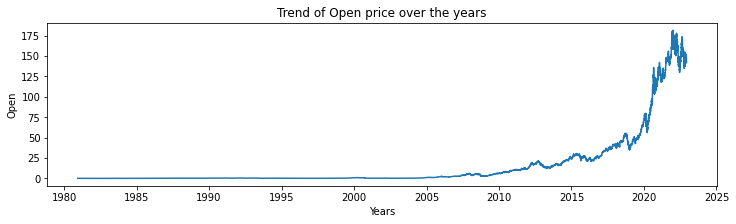

In [23]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(apple_share_price_data["Date"], apple_share_price_data["Open"])
axes.set_xlabel('Years')
axes.set_ylabel('Open')
axes.set_title('Trend of Open price over the years');


### Extracting Dividends


I will extract the dividends, which are the distribution of a companys profits to shareholders, also known as an amount of money returned per share an investor owns


In [30]:
apple_div=apple.dividends.to_frame().reset_index()
apple_div.head()

,Date,Dividends
0,1987-05-11 00:00:00-04:00,0.000536
1,1987-08-10 00:00:00-04:00,0.000536
2,1987-11-17 00:00:00-05:00,0.000714
3,1988-02-12 00:00:00-05:00,0.000714
4,1988-05-16 00:00:00-04:00,0.000714


I will plot the dividends overtime:


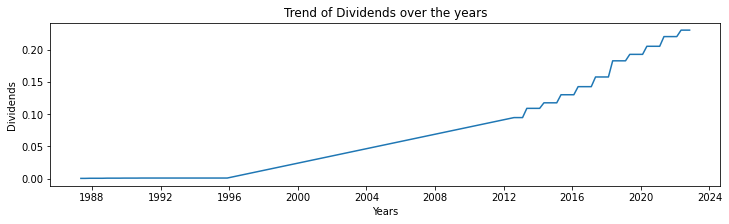

In [32]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(apple_div["Date"], apple_div["Dividends"])
axes.set_xlabel('Years')
axes.set_ylabel('Dividends')
axes.set_title('Trend of Dividends over the years');
